In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

# Import local libraries
sys.path.append('../src')
import processing

%matplotlib inline

# Uncomment to see full cell text
pd.set_option('display.max_colwidth', 0)

raw = pd.read_excel("../data/raw/inquire-boulder-faq-text/inquire-boulder-active-faqs-2019-01-02.xls.xlsx").dropna()
faq = pd.read_csv("../data/processed/faq-text-separated.csv")

In [2]:
raw.set_index(keys=['Department', 'Category', 'Topic']).sort_index().drop(labels=('Active'), axis=1).dropna()

FAQ  \
Department          Category                                              Topic                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [3]:
raw['length'] = raw.FAQ.apply(lambda x: len(x))

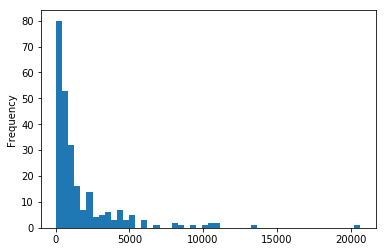

In [4]:
raw.length.plot(kind='hist', bins=50)

In [5]:
raw[raw['length'] == raw['length'].max()]

Topic Category                            Department  \
147  Mountain Lions  Animals  Planning Housing and Sustainability    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

So, there seems to be a lot of info about local mountain lions!

# Let's Generate a Word Cloud!
with help from [this page](https://www.datacamp.com/community/tutorials/wordcloud-python)


In [55]:
corpus = ' '.join([q + ' ' + a for q, a in zip(faq.question, faq.answer)])
corpus = ' '.join(processing.text_process(corpus, lemmas=False))
# domain_stopwords = ['boulder', 'city', 'service', 'request', 'information']
domain_stopwords = []

In [64]:
logo_mask = np.array(Image.open('../vizualization/city-boulder-logo-edit.png'))
color_mask = np.array(Image.open('../vizualization/city-boulder-logo-color.png'))

cloud = WordCloud(
    stopwords=domain_stopwords, background_color="white", contour_width=3, contour_color='black',
    collocations=False, max_words=1000, mask=logo_mask).generate(text=corpus)
image_colors = ImageColorGenerator(color_mask)

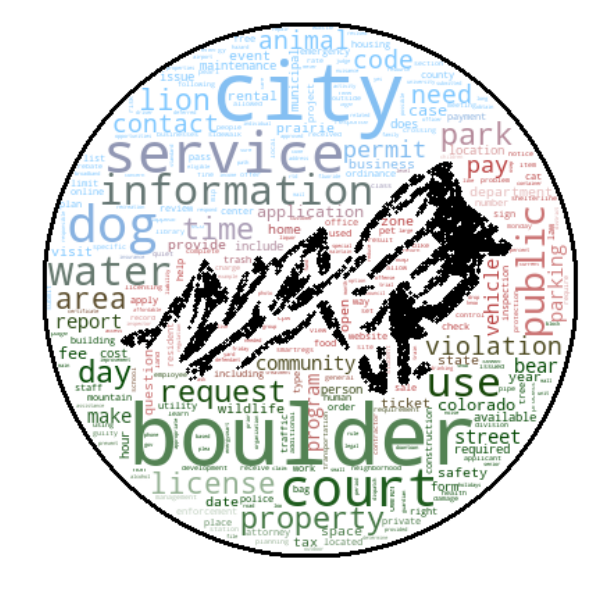

In [65]:
plt.pyplot.figure(figsize = (8, 8), facecolor = None) 
plt.pyplot.imshow(cloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.pyplot.axis("off")
plt.pyplot.tight_layout(pad = 0) 
plt.pyplot.show()

In [66]:
cloud.to_file("../vizualization/logo_cloud_color.png")

In [52]:
logo_mask = np.array(Image.open('../vizualization/city-boulder-logo-edit.png'))
cloud = WordCloud(max_words=1000, width=800, height=800, collocations=False, stopwords=domain_stopwords, mask=logo_mask,
                  background_color='white', contour_width=3, colormap="copper").generate(text=corpus)

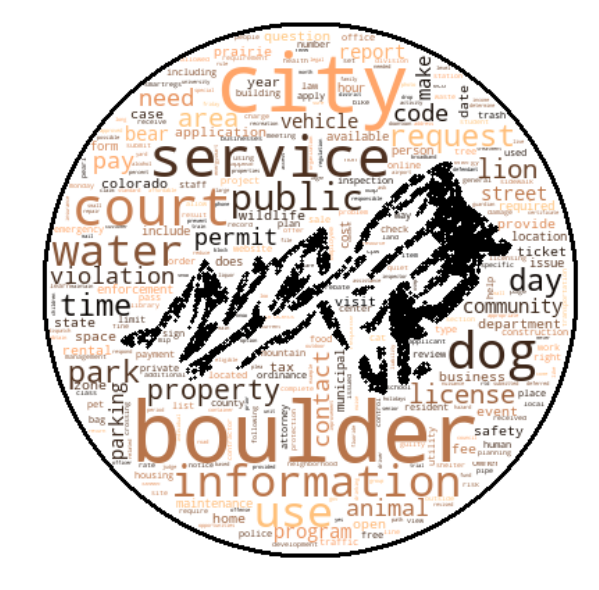

In [53]:
plt.pyplot.figure(figsize = (8, 8), facecolor = None) 
plt.pyplot.imshow(cloud, interpolation='bilinear')
plt.pyplot.axis("off")
plt.pyplot.tight_layout(pad = 0) 
plt.pyplot.show()

In [54]:
cloud.to_file("../vizualization/logo_cloud_copper.png")